In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
# Load the dataset
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

## Exploratory Data Analysis

In [3]:
ev_data.size

3023722

In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
ev_data.shape

(177866, 17)

The dataset has 177866 rows, and 17 columns

In [7]:
ev_data.isna().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
ev_data = ev_data.dropna()

## Data Visualization and Analysis

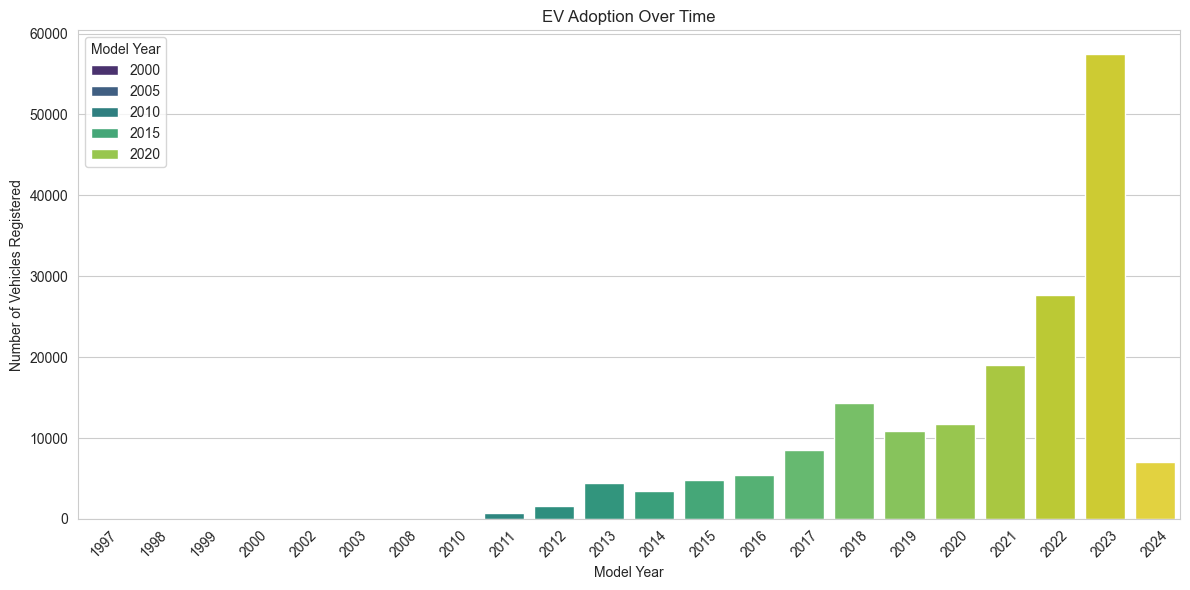

In [9]:
sns.set_style("whitegrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis", hue=ev_adoption_by_year.index)
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart reveals a clear trend of increasing electric vehicle (EV) adoption over time. Notably, there has been a significant upward shift starting around 2016. Initially, the number of registered EVs grew modestly, but from 2017 onward, it began to rise more rapidly. 2023 stands out as a pivotal year, with the highest bar on the graph, indicating a peak in EV adoption.

Now, let’s delve into the analysis. We’ll begin by identifying the top three counties based on EV registrations and subsequently explore the distribution of EVs within the cities of those counties.

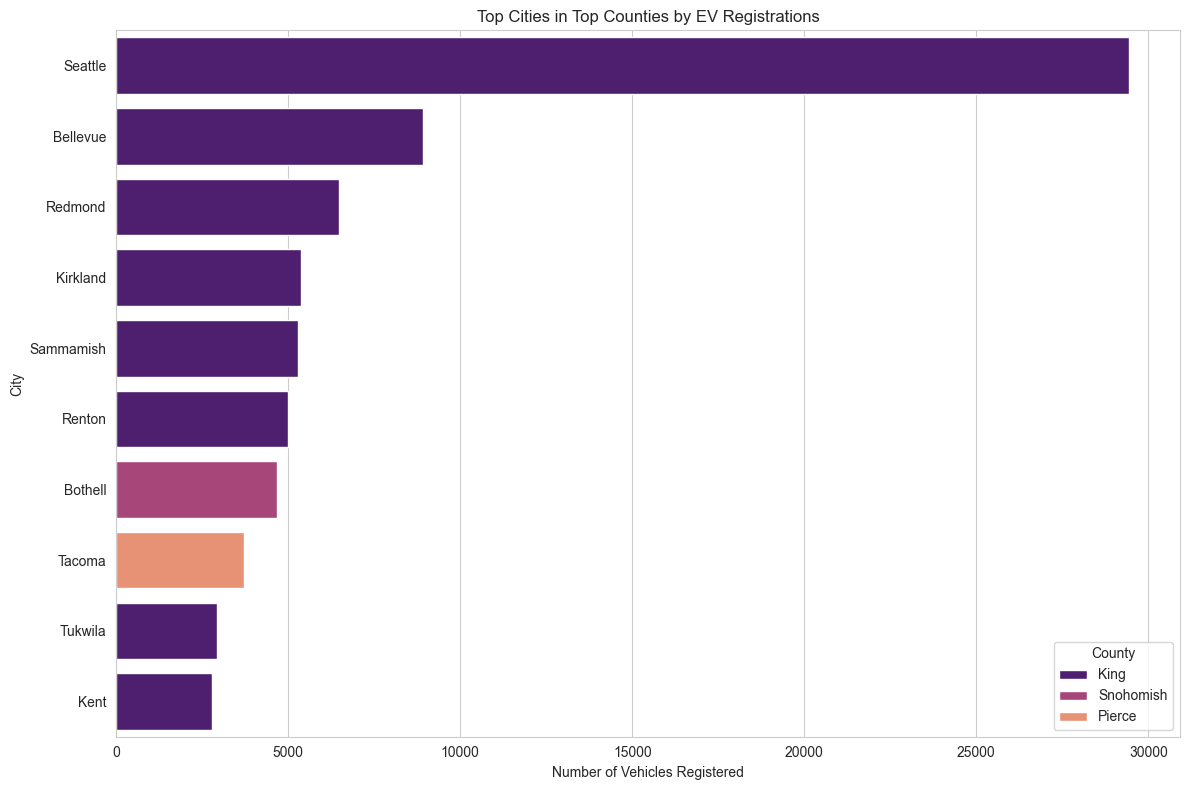

In [10]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The bar chart above compares the number of electric vehicles registered in various cities within three counties: King, Snohomish, and Pierce. Each horizontal bar represents a city, and its length corresponds to the number of vehicles registered, color-coded by county. Here are the key findings:

Seattle, located in King County, stands out with the highest number of EV registrations by a significant margin, far surpassing other cities.
Bellevue and Redmond, also in King County, follow Seattle with the next highest registrations, although these numbers are considerably lower than Seattle’s.
Cities in Snohomish County, such as Kirkland and Sammamish, exhibit moderate EV registrations.
Tacoma and Tukwila, representing Pierce County, have the fewest EV registrations among the listed cities, with Tacoma slightly ahead of Tukwila.
The majority of cities shown are from King County, indicating that it dominates EV registrations among the three counties.
Overall, the graph highlights that EV adoption is not uniform across cities and is more concentrated in certain areas, particularly in King County.

Next, let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and adoption patterns. Let’s visualize the distribution of electric vehicle types to identify the most popular categories among the registered vehicles.

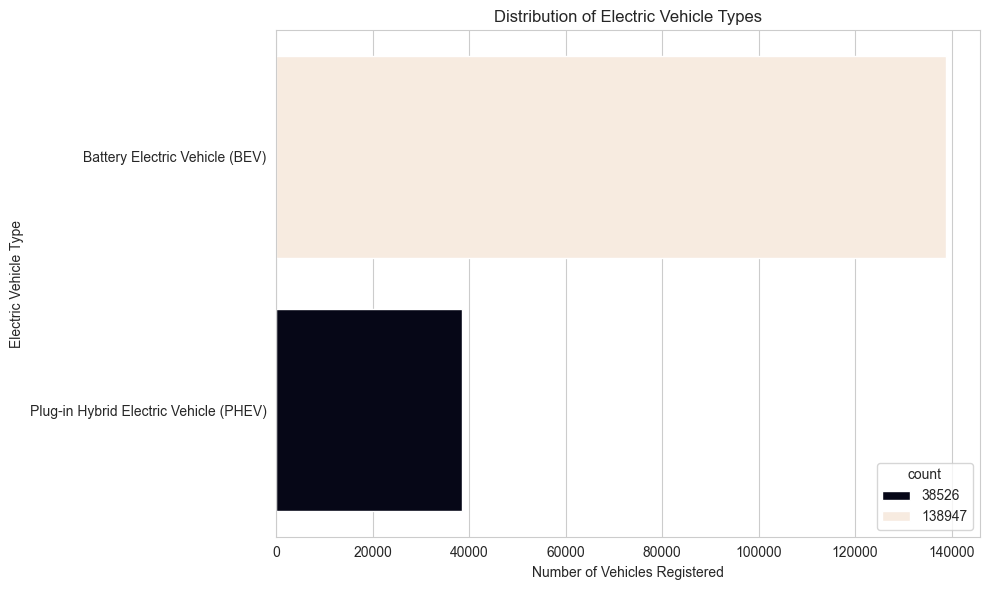

In [11]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket", hue=ev_type_distribution)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The graph above indicates that Battery Electric Vehicles (BEVs) are more popular or preferred over Plug-in Hybrid Electric Vehicles (PHEVs) among the electric vehicles registered in the United States.

Now, let's turn our attention to the popularity of electric vehicle (EV) manufacturers and models among the registered vehicles. This examination will assist us in pinpointing which manufacturers and specific models hold sway in the EV market, potentially shedding light on consumer preferences, brand loyalty, and the effectiveness of manufacturers' strategies in promoting electric mobility.

First, we'll examine the most popular manufacturers. Then, we'll delve deeper into the most sought-after models within those manufacturers.

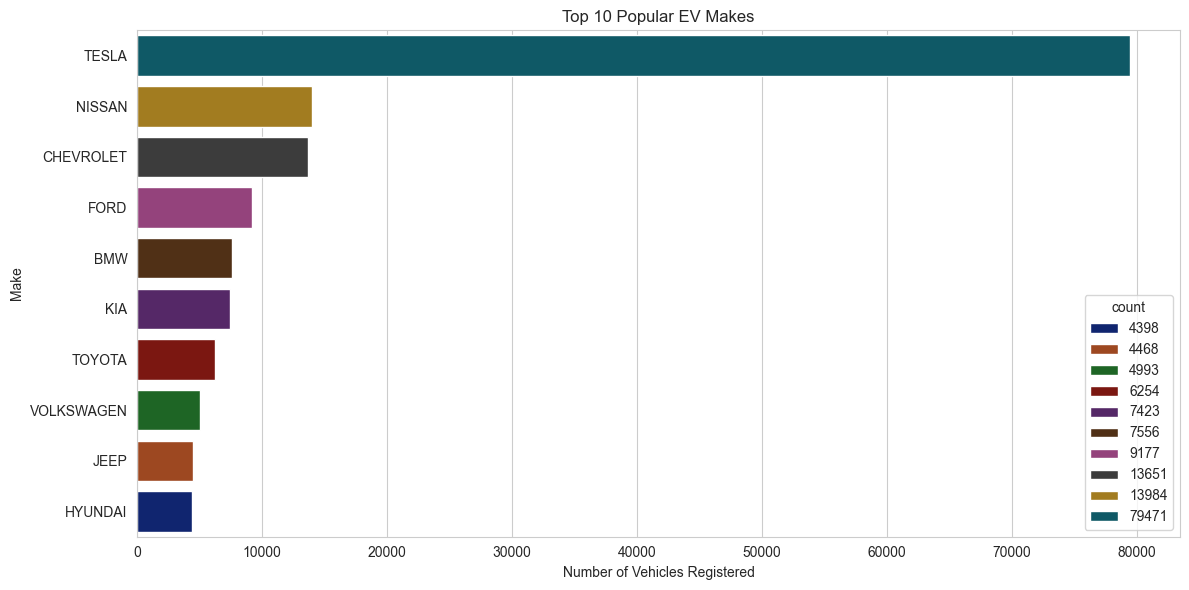

In [12]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="dark", hue=ev_make_distribution)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The chart above indicates the following:

- TESLA holds a dominant position in the market, registering the highest number of vehicles by a considerable margin.
- NISSAN ranks as the second most popular manufacturer, trailed by CHEVROLET, albeit with significantly fewer registrations compared to TESLA.
- Following in descending order of registered vehicles are FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI.

Now, let's dive deeper into the most popular models within these top manufacturers to gain a more nuanced understanding of consumer preferences at the model level.

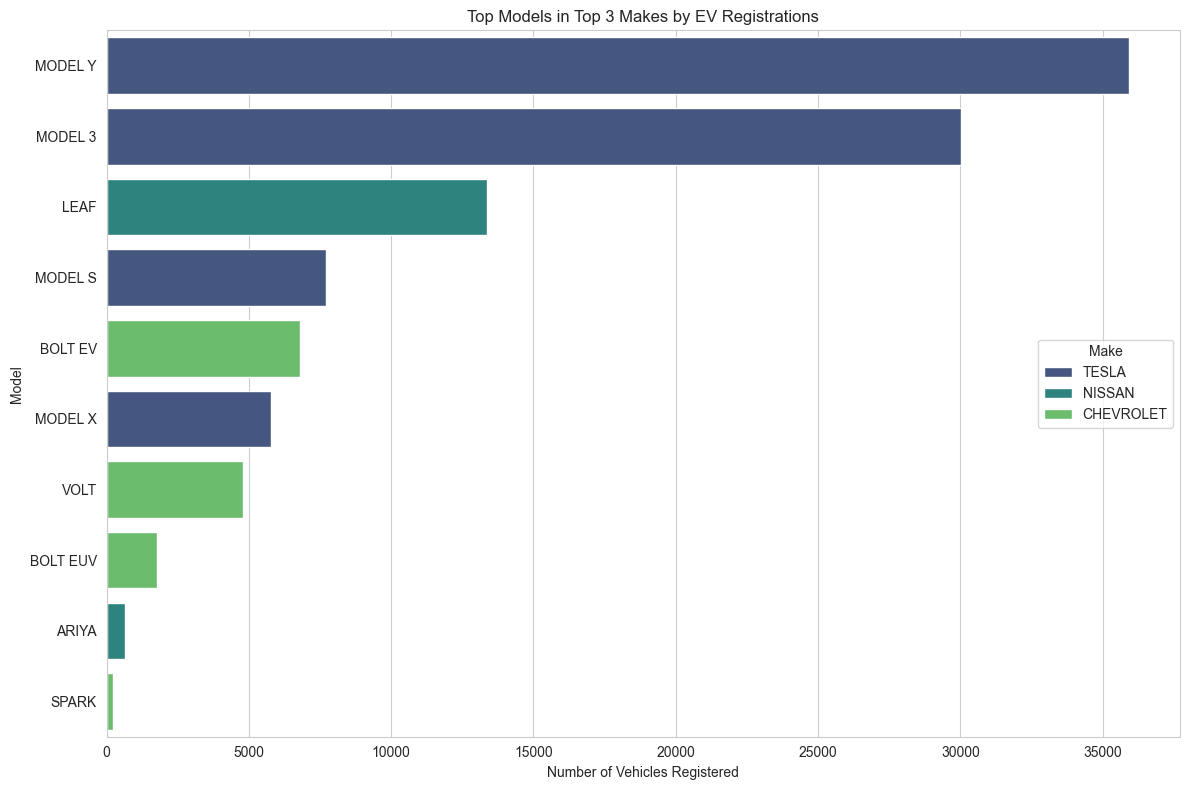

In [13]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The graph above illustrates the distribution of electric vehicle registrations across different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here's what we found:

- TESLA's MODEL Y and MODEL 3 lead the pack in terms of registrations, with MODEL Y boasting the highest number of registrations.
- NISSAN's LEAF secures the third spot as the most registered model and stands out as the most registered non-TESLA vehicle.
- Additionally, TESLA's MODEL S and MODEL X demonstrate a significant number of registrations.
- Moving on to CHEVROLET, BOLT EV and VOLT claim prominent positions in the ranking with considerable registrations, followed closely by BOLT EUV.
- On the lower end of the spectrum, NISSAN's ARIYA and CHEVROLET's SPARK exhibit the least number of registrations among the showcased models.

Next, let's dive into the electric range of vehicles, a crucial factor for analyzing the electric vehicle market's size. Electric range denotes the distance an EV can travel on a single charge, and advancements in battery technology have steadily increased these ranges over time. We'll explore the distribution of electric ranges in the dataset to identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers.

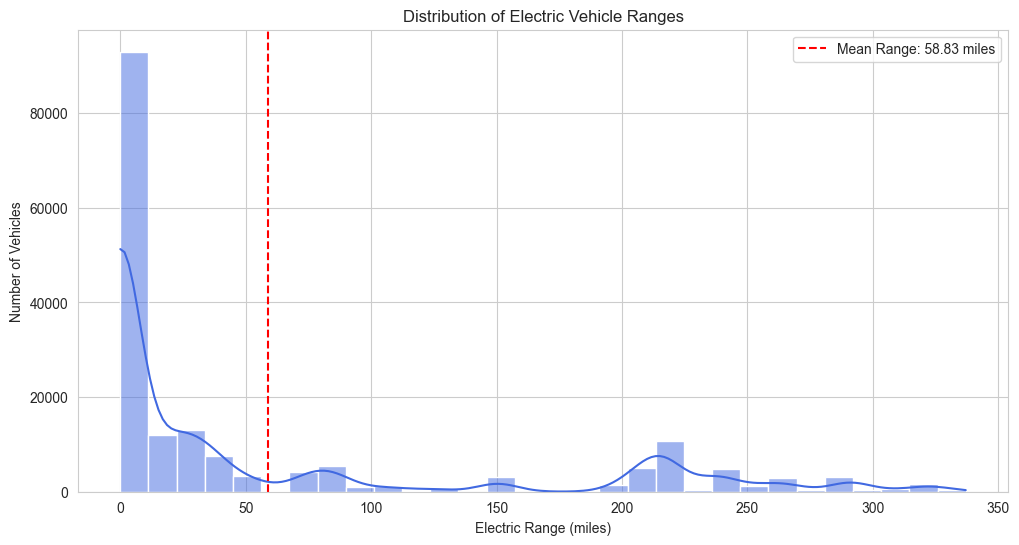

In [14]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The graph above illustrates the mean electric range distribution, offering the following insights:

- A notable concentration of vehicles exhibits a low electric range, with a significant peak occurring just before the 50-mile mark.
- The distribution skews to the right, with a prolonged tail stretching towards higher ranges. However, vehicles with higher ranges are considerably less frequent.
- The mean electric range for this vehicle set is approximately 58.84 miles, a value relatively lower compared to the maximum ranges depicted in the graph.
- Despite the existence of electric vehicles boasting ranges of up to approximately 350 miles, a majority of vehicles have ranges below the mean.
  
These findings suggest that while electric vehicles with extensive ranges are available, the average range is skewed lower due to a substantial proportion of vehicles featuring shorter ranges.

Analyzing the trend of electric ranges over model years can provide valuable insights into the evolution of electric vehicle capabilities over time. Let's explore this trend to understand how advancements in battery technology and vehicle design have impacted the electric range of electric vehicles.

We'll start by visualizing the trend of electric ranges over model years using a line plot. This will help us identify any patterns or trends in the data. We'll look for a positive trend, indicating continuous improvements in electric range capabilities over the years.

Here's how we can proceed:

- Gather the data: We'll need the electric range and model year information from our dataset.
- Calculate the mean electric range for each model year.
- Plot the mean electric range against model years to visualize the trend.

Let's go ahead and create this visualization to analyze the trend of electric ranges over model years. If you have the dataset available, we can proceed with the analysis.

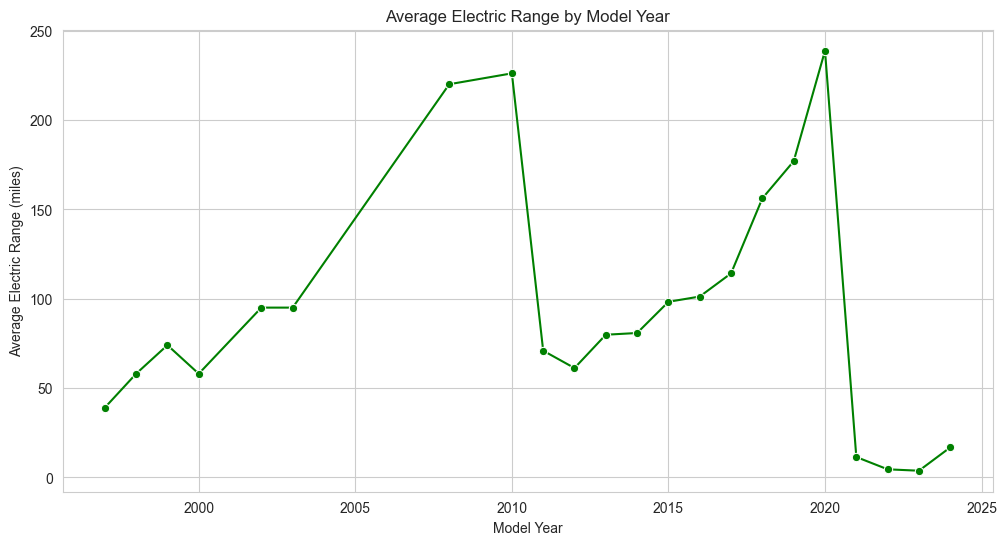

In [15]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The graph above illustrates the progression of the average electric range of vehicles from approximately 2000 to 2024. Here are the key findings from the analysis:

General Upward Trend: There is a noticeable upward trend in the average electric range of electric vehicles over the years, indicating advancements in technology and battery efficiency.

Peak Around 2020: A notable peak in the average range is observed around the year 2020, reaching its highest point during this period.

Significant Drop Post-2020: Following the peak in 2020, there is a substantial drop in the average range. This could be attributed to incomplete data for the following years or the introduction of several lower-range models.

Slight Recovery: Despite the decline, there is a slight recovery in the average range in the most recent year depicted on the graph.

Overall Trend: Despite fluctuations, the overall trend over the last two decades has been towards increasing the electric range of electric vehicles.

These findings suggest a positive trajectory in improving the electric range of electric vehicles over time, albeit with some fluctuations in recent years. This underscores the ongoing efforts by manufacturers to enhance battery technology and address consumer concerns regarding range anxiety.

Next, let's dive into how electric ranges vary among the top manufacturers and models to gain insights into how different manufacturers are addressing this crucial aspect and identify models with superior range capabilities.

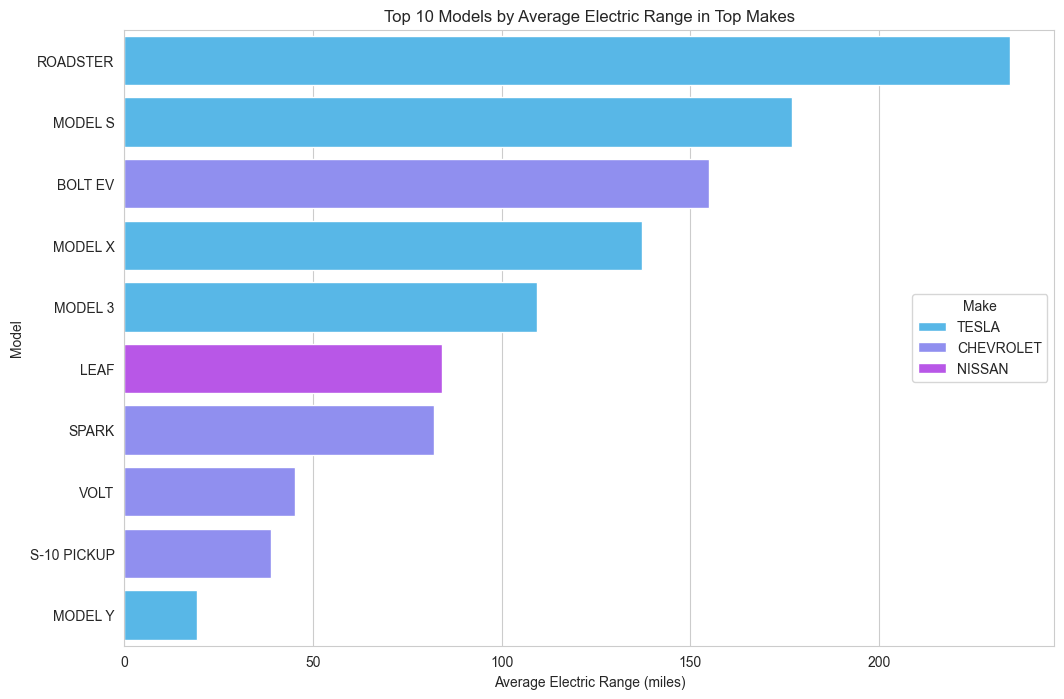

In [16]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

## Estimated Market Size Analysis of Electric Vehicles in the United States

Now, let’s proceed to determine the estimated market size of electric vehicles (EVs) in the United States. Our initial step involves tabulating the number of EVs registered annually:

Yearly EV Registrations: We will systematically count the quantity of EV registrations recorded each year. This process will offer valuable insights into the annual adoption rate of EVs within the nation.

By delineating the number of EV registrations on a yearly basis, we can better comprehend the evolving landscape of EV adoption over time. This foundational analysis will serve as a precursor to further exploration and understanding of the burgeoning EV market in the United States.

In [17]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset covers electric vehicle registrations from 1997 to 2024, though the 2024 data is incomplete, only extending to March. Here's a recent summary of EV registrations:

- In 2021, 19,063 EVs were registered.
- The count increased to 27,708 in 2022.
- A significant leap to 57,519 EVs occurred in 2023.
- For 2024, only 7,072 EVs are registered so far, indicating incomplete data.

To forecast the total 2024 EV registrations, we'll use a growth rate approach based on complete data from previous years.

We'll determine the Compound Annual Growth Rate (CAGR) between 2023, a recent year with complete data, and an earlier year to project the 2024 figures. Using this growth rate, we can estimate the market size for the next five years. Let's proceed with these calculations.

In [18]:
# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

for key, value in forecasted_evs.items():
    print(f"{key}: {value}")

2024: 79079.20808938889
2025: 119653.96274428742
2026: 181047.22020265696
2027: 273940.74706208805
2028: 414497.01805382164
2029: 627171.3128407666


Now, let’s plot the estimated market size data:

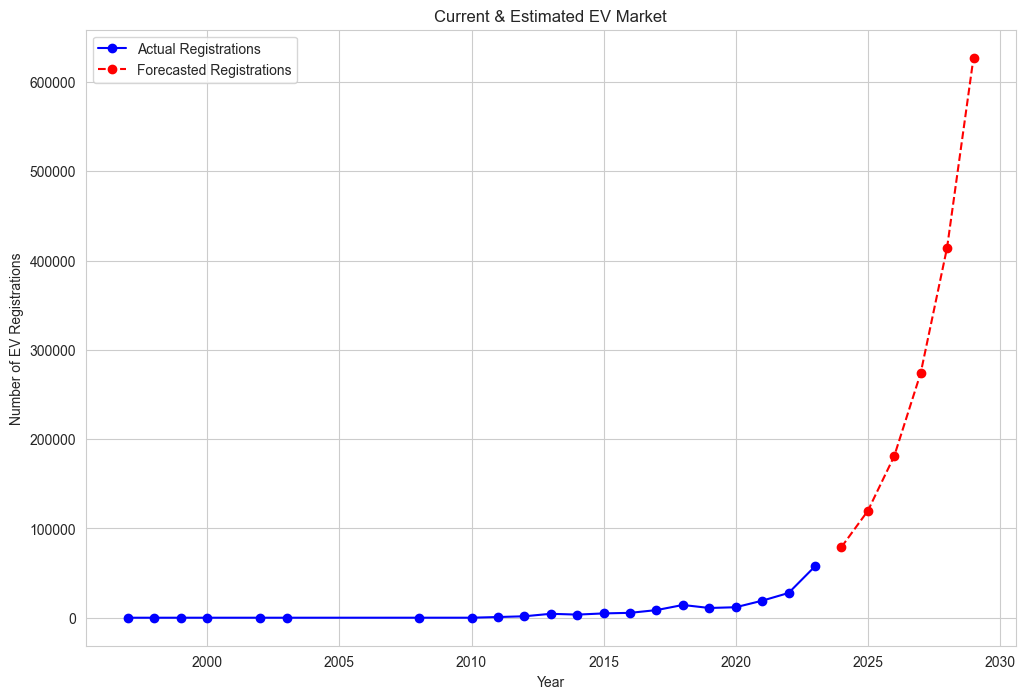

In [19]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

The analysis of the graph reveals the following key points:

1. **Historical Trends:** EV registrations remained relatively low and stable until approximately 2010. After that, there was a consistent and steep upward trend, indicating a significant increase in EV adoption over time.

2. **Forecasted Growth:** The forecasted EV registrations show an even more pronounced increase in the near future. The data suggest a sharp rise in registrations expected to occur in the coming years.

3. **Market Expansion:** Considering the growing trend in actual EV registrations and the projected acceleration based on the forecast data, it can be inferred that the EV market size is poised for significant expansion. The steep increase in forecasted registrations indicates a rising consumer adoption of EVs, which is likely to continue in the foreseeable future.

4. **Promising Future:** Overall, the data points toward a promising future for the EV industry. The trends suggest a notable shift in consumer preferences toward electric vehicles, which could lead to increased investment and business opportunities in the sector.

In summary, the analysis underscores the potential for substantial growth in the EV market, reflecting evolving consumer preferences and presenting promising prospects for stakeholders in the industry.